<a href="https://colab.research.google.com/github/Nadiam75/DeepLearning_HW_3/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### imports, constants, functions

In [1]:
import tensorflow as tf
import numpy as np
import math, random
import matplotlib.pyplot as plt
from scipy import signal
from random import randrange
from numpy import random

In [2]:
def make_noisy(Y, noise_range=(-0.35, 0.35)):
    noise = np.zeros(Y.shape)
    if randrange(2) == 0 :
      noise = np.random.uniform(noise_range[0], noise_range[1], size=Y.shape)
    else:
      noise = np.random.normal(0,0.25,Y.shape)
    return Y + noise


In [3]:
def calc_power(x):
  s=np.square(x)
  average = sum(s) / len(s)
  return average

In [4]:
def calc_SNR(reference, signal):
    noise = signal-reference

    powS = calc_power(signal)
    powN = calc_power(noise)
    if powN !=0:
      return 10*math.log10(powS/powN)
    else:
      return "ERROR"


In [5]:
figSize = (15,3)
samplingConst =  100
timePoints = np.linspace(0, 1, 1000 * samplingConst)

###sawtooth

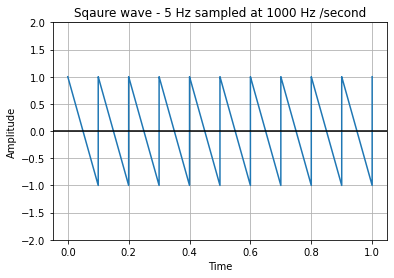

In [6]:
SAWTOOTH = signal.sawtooth(-2 * np.pi * 10 * timePoints  - 0.0004)
plt.plot(timePoints, SAWTOOTH )
plt.title('Sqaure wave - 5 Hz sampled at 1000 Hz /second')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.ylim(-2, 2)
plt.show()

### triangle

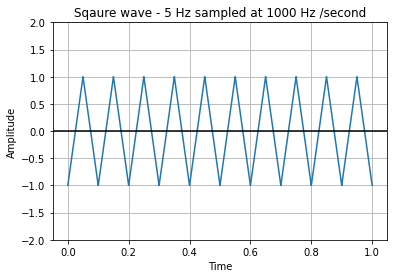

In [7]:
TRIANGLE = signal.sawtooth(2 * np.pi * 10 * timePoints, 0.5)
plt.plot(timePoints, TRIANGLE)
plt.title('Sqaure wave - 5 Hz sampled at 1000 Hz /second')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.ylim(-2, 2)
plt.show()

### sine

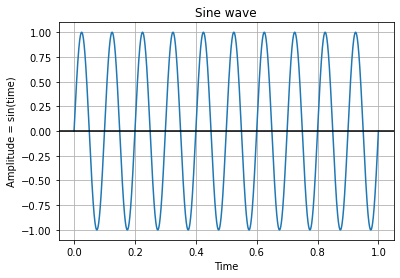

In [8]:
SINE   = np.sin(2 * np.pi *10* timePoints)
plt.plot(timePoints, SINE)
plt.title('Sine wave') 
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)') 
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()
# Display the sine wave

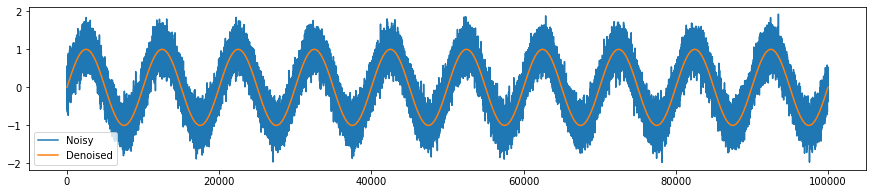

In [9]:
plt.figure(figsize = figSize)
plt.plot( make_noisy(SINE), label='Noisy')
plt.plot(SINE, label ='Denoised')
plt.legend()

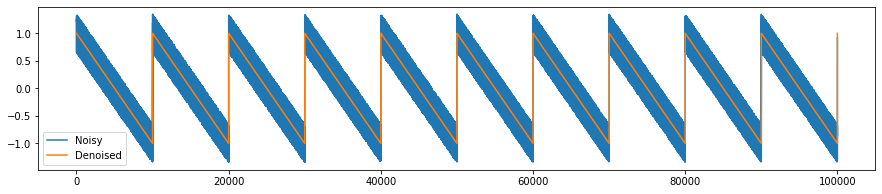

In [10]:
plt.figure(figsize =figSize)
plt.plot( make_noisy(SAWTOOTH), label='Noisy')
plt.plot(SAWTOOTH, label ='Denoised')
plt.legend()

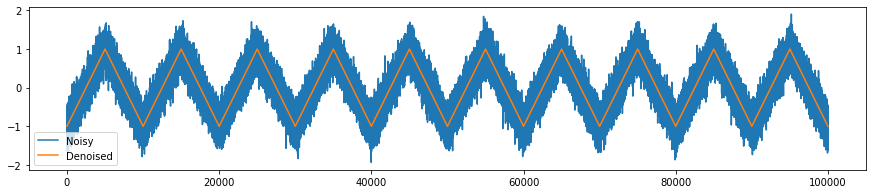

In [11]:
plt.figure(figsize = figSize)
plt.plot( make_noisy(TRIANGLE), label='Noisy')
plt.plot(TRIANGLE, label ='Denoised')
plt.legend()

### Sine wave noise removal using RNN and LSTM 

In [13]:
denoised = SINE
noisy= make_noisy(SINE)
y_train , y_validation , y_test = denoised[ :700*samplingConst  ]   , denoised[ 700*samplingConst:800*samplingConst ]  , denoised[ 800*samplingConst: ] 
x_train , x_validation , x_test = noisy[ :700*samplingConst ]   , noisy[ 700*samplingConst:800*samplingConst  ]  , noisy[ 800*samplingConst: ]

In [14]:
x_train = x_train.reshape((700,samplingConst,1))
x_validation = x_validation.reshape((100,samplingConst,1))
x_test = x_test.reshape((200,samplingConst,1))

y_train = y_train.reshape((700,samplingConst,1))
y_validation = y_validation.reshape((100,samplingConst,1))
y_test = y_test.reshape((200,samplingConst,1))

In [633]:
# SimpleRNN
SimpleRNNmodel=tf.keras.models.Sequential()
SimpleRNNmodel.add(tf.keras.layers.SimpleRNN(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
SimpleRNNmodel.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
SimpleRNNmodel.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history1 = SimpleRNNmodel.fit(x_train, y_train, epochs=6, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)

Epoch 1/6
700/700 [==============================] - 10s 14ms/step - loss: 0.0538 - val_loss: 0.0210
Epoch 2/6
700/700 [==============================] - 9s 13ms/step - loss: 0.0141 - val_loss: 0.0086
Epoch 3/6
700/700 [==============================] - 9s 13ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 4/6
700/700 [==============================] - 9s 13ms/step - loss: 0.0121 - val_loss: 0.0085
Epoch 5/6
700/700 [==============================] - 9s 13ms/step - loss: 0.0092 - val_loss: 0.0083
Epoch 6/6
700/700 [==============================] - 9s 13ms/step - loss: 0.0100 - val_loss: 0.0062


Text(0.5, 1.0, 'simple RNN, SINE, Loss History')

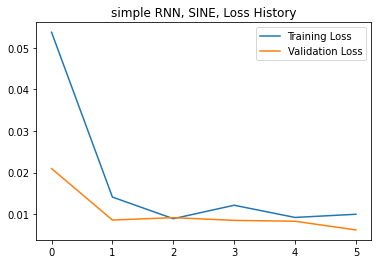

In [634]:
fig = plt.figure()
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('simple RNN, SINE, Loss History')

In [635]:
generated_output = SimpleRNNmodel.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [636]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

In [637]:
SNR_BEFORE_SINE_RNN

9.581515671992268

In [638]:
SNR_AFTER_SINE_RNN

18.49842130692618

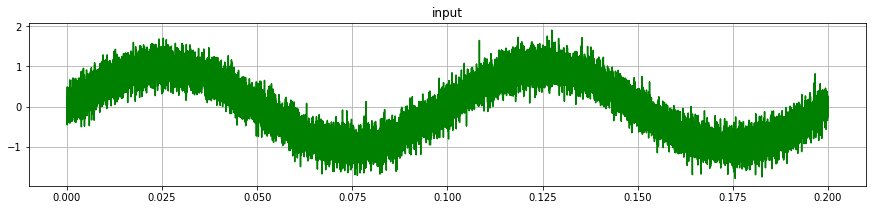

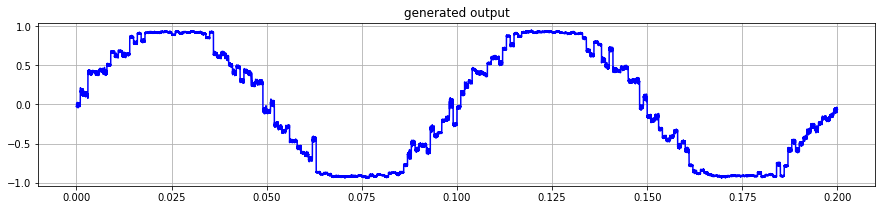

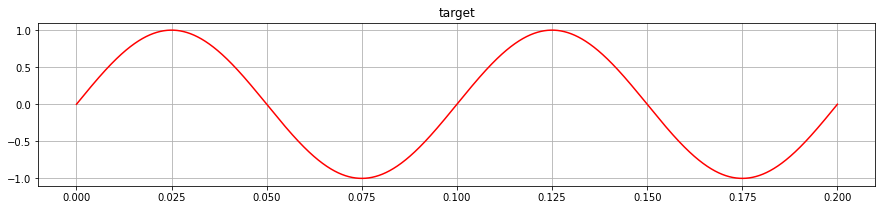

In [640]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')
plt.grid()

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')
plt.grid()

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')
plt.grid()


In [572]:
# LSTM
model_LSTM=tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
model_LSTM.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
model_LSTM.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history2 = model_LSTM.fit(x_train, y_train, epochs=30, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


Epoch 1/30
700/700 [==============================] - 20s 25ms/step - loss: 0.0443 - val_loss: 0.0024
Epoch 2/30
700/700 [==============================] - 17s 25ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 3/30
700/700 [==============================] - 17s 24ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/30
700/700 [==============================] - 17s 24ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 5/30
700/700 [==============================] - 17s 24ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 6/30
700/700 [==============================] - 18s 25ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 7/30
700/700 [==============================] - 17s 25ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 8/30
700/700 [==============================] - 17s 25ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/30
700/700 [==============================] - 19s 27ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 10/30
700/700 [==============================] - 17s 25ms/step - loss: 0.001

In [ ]:
fig = plt.figure()
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('LSTM, Loss History')

In [490]:
generated_output = model_LSTM.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

Text(0.5, 1.0, 'generated output')

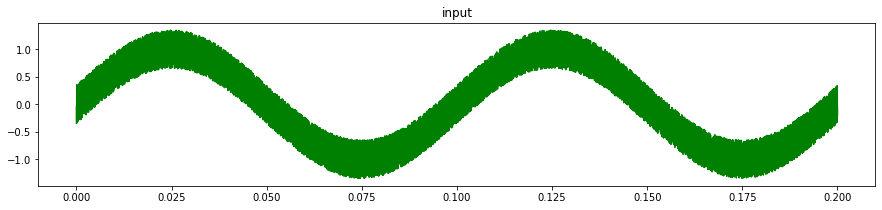

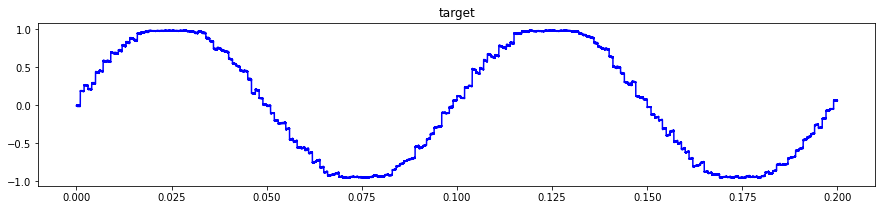

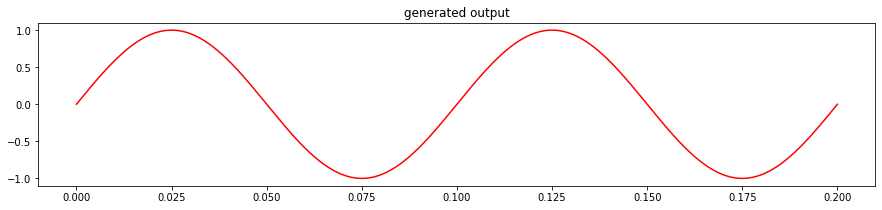

In [491]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')

### SAWTOOTH wave noise removal using SIMPLE RNN and LSTM

In [494]:
denoised = SAWTOOTH
noisy= make_noisy(SAWTOOTH)
y_train , y_validation , y_test = denoised[ :700*samplingConst  ]   , denoised[ 700*samplingConst:800*samplingConst ]  , denoised[ 800*samplingConst: ] 
x_train , x_validation , x_test = noisy[ :700*samplingConst ]   , noisy[ 700*samplingConst:800*samplingConst  ]  , noisy[ 800*samplingConst: ]

In [495]:
x_train = x_train.reshape((700,samplingConst,1))
x_validation = x_validation.reshape((100,samplingConst,1))
x_test = x_test.reshape((200,samplingConst,1))

y_train = y_train.reshape((700,samplingConst,1))
y_validation = y_validation.reshape((100,samplingConst,1))
y_test = y_test.reshape((200,samplingConst,1))

In [496]:
# SimpleRNN
SimpleRNNmodel=tf.keras.models.Sequential()
SimpleRNNmodel.add(tf.keras.layers.SimpleRNN(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
SimpleRNNmodel.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
SimpleRNNmodel.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history3 = SimpleRNNmodel.fit(x_train, y_train, epochs=6, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


Epoch 1/10
700/700 [==============================] - 10s 13ms/step - loss: 0.0522
Epoch 2/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0145
Epoch 3/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0105
Epoch 4/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0083
Epoch 5/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0061
Epoch 6/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0056
Epoch 7/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0066
Epoch 8/10
700/700 [==============================] - 9s 13ms/step - loss: 0.0052
Epoch 9/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0049
Epoch 10/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0050


In [ ]:
fig = plt.figure()
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('simple RNN, SAWTOOTH Loss History')

In [497]:
generated_output = SimpleRNNmodel.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

Text(0.5, 1.0, 'generated output')

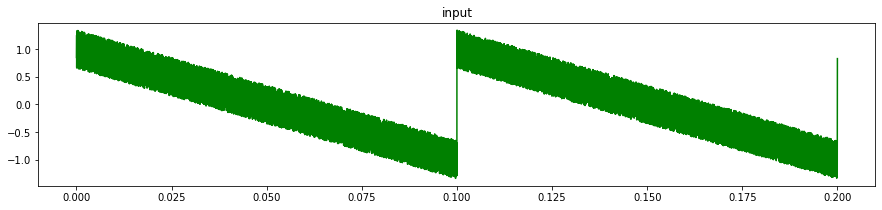

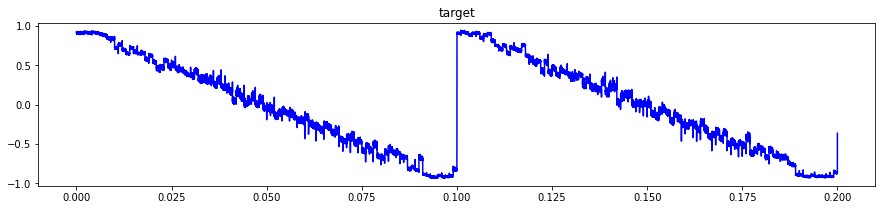

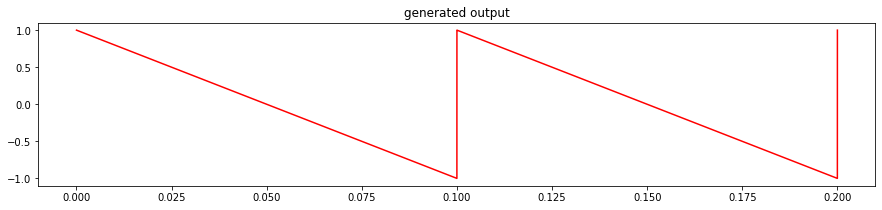

In [498]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')


In [499]:
# LSTM
model_LSTM=tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
model_LSTM.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
model_LSTM.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history4 = model_LSTM.fit(x_train, y_train, epochs=10, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


Epoch 1/10
700/700 [==============================] - 18s 23ms/step - loss: 0.0321
Epoch 2/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0043
Epoch 3/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0037
Epoch 4/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0036
Epoch 5/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0035
Epoch 6/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0034
Epoch 7/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0032
Epoch 8/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0028
Epoch 9/10
700/700 [==============================] - 17s 24ms/step - loss: 0.0028
Epoch 10/10
700/700 [==============================] - 17s 25ms/step - loss: 0.0032


In [ ]:
fig = plt.figure()
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('LSTM, Loss History')

In [500]:
generated_output = model_LSTM.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

Text(0.5, 1.0, 'generated output')

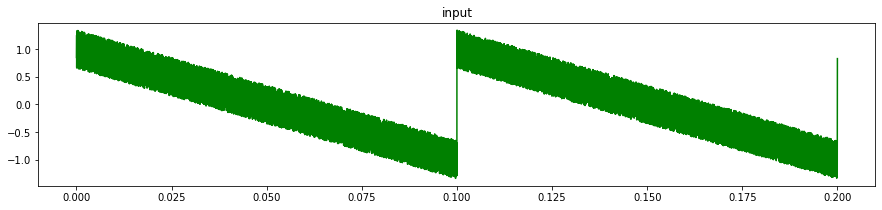

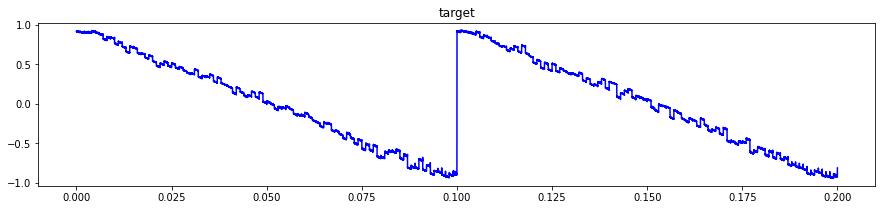

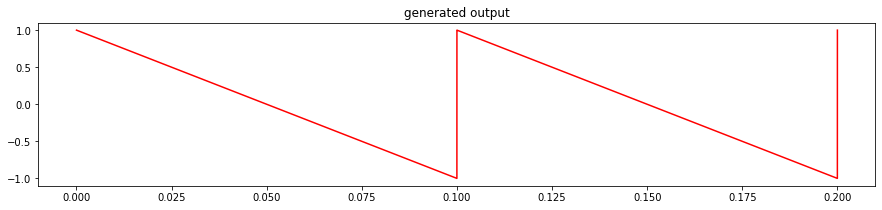

In [501]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')


###TRIANGLE wave noise removal using simple RNN and LSTM

In [502]:
denoised = TRIANGLE
noisy= make_noisy(TRIANGLE)
y_train , y_validation , y_test = denoised[ :700*samplingConst  ]   , denoised[ 700*samplingConst:800*samplingConst ]  , denoised[ 800*samplingConst: ] 
x_train , x_validation , x_test = noisy[ :700*samplingConst ]   , noisy[ 700*samplingConst:800*samplingConst  ]  , noisy[ 800*samplingConst: ]

In [503]:
x_train = x_train.reshape((700,samplingConst,1))
x_validation = x_validation.reshape((100,samplingConst,1))
x_test = x_test.reshape((200,samplingConst,1))

y_train = y_train.reshape((700,samplingConst,1))
y_validation = y_validation.reshape((100,samplingConst,1))
y_test = y_test.reshape((200,samplingConst,1))

In [504]:
# SimpleRNN
SimpleRNNmodel=tf.keras.models.Sequential()
SimpleRNNmodel.add(tf.keras.layers.SimpleRNN(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
SimpleRNNmodel.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
SimpleRNNmodel.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history5 = SimpleRNNmodel.fit(x_train, y_train, epochs=10, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


Epoch 1/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0395
Epoch 2/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0125
Epoch 3/10
700/700 [==============================] - 8s 11ms/step - loss: 0.0116
Epoch 4/10
700/700 [==============================] - 8s 11ms/step - loss: 0.0121
Epoch 5/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0100
Epoch 6/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0087
Epoch 7/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0082
Epoch 8/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0081
Epoch 9/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0071
Epoch 10/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0064


In [ ]:
fig = plt.figure()
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('simple RNN, SAWTOOTH Loss History')

In [505]:
generated_output = SimpleRNNmodel.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

Text(0.5, 1.0, 'generated output')

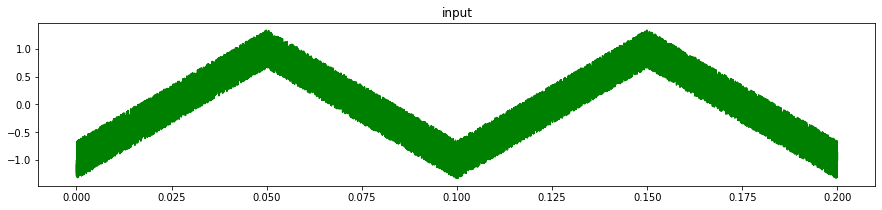

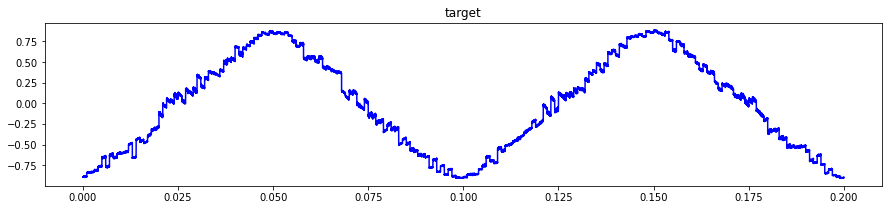

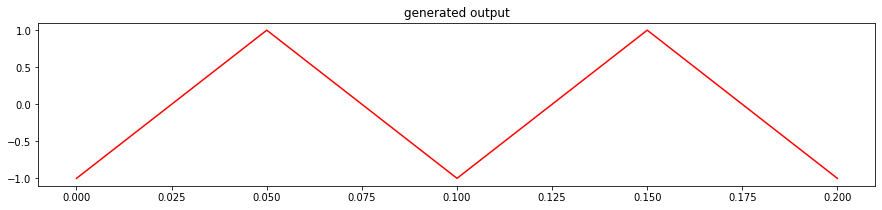

In [506]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')


In [507]:
# LSTM
model_LSTM=tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
model_LSTM.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
model_LSTM.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history6 = model_LSTM.fit(x_train, y_train, epochs=10, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


Epoch 1/10
700/700 [==============================] - 17s 22ms/step - loss: 0.0303
Epoch 2/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0048
Epoch 3/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0047
Epoch 4/10
700/700 [==============================] - 15s 21ms/step - loss: 0.0039
Epoch 5/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0039
Epoch 6/10
700/700 [==============================] - 15s 22ms/step - loss: 0.0039
Epoch 7/10
700/700 [==============================] - 15s 22ms/step - loss: 0.0035
Epoch 8/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0036
Epoch 9/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0033
Epoch 10/10
700/700 [==============================] - 15s 21ms/step - loss: 0.0036


In [ ]:
fig = plt.figure()
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('LSTM, Loss History')

In [508]:
generated_output = model_LSTM.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

Text(0.5, 1.0, 'generated output')

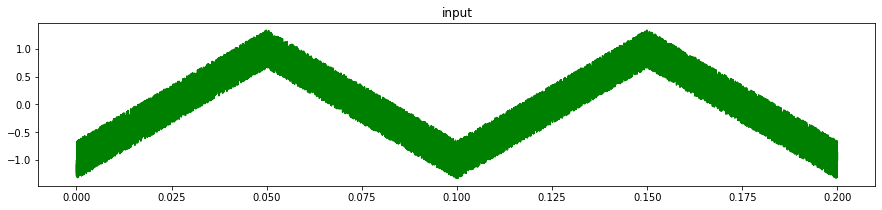

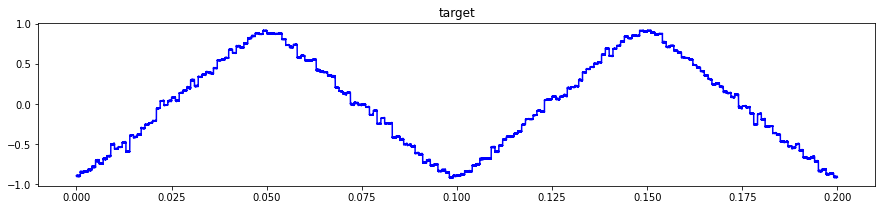

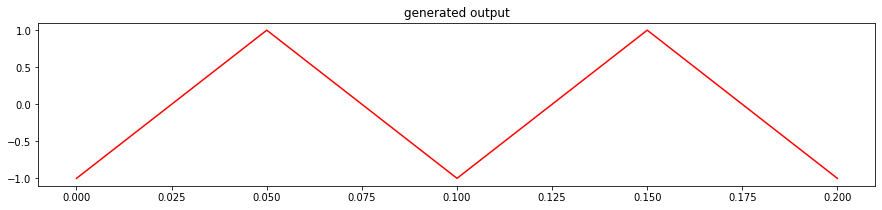

In [509]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')

### unstationary noise

In [15]:
np.pi


3.141592653589793

###2D

In [346]:
def create_noise(sig):
  return sig +  np.random.normal(0,0.05,sig.shape)

In [347]:
figureSize = (12, 5)
t = np.linspace(0, 20*np.pi, 1000 )
samplingConst = 100

a circle with R=1

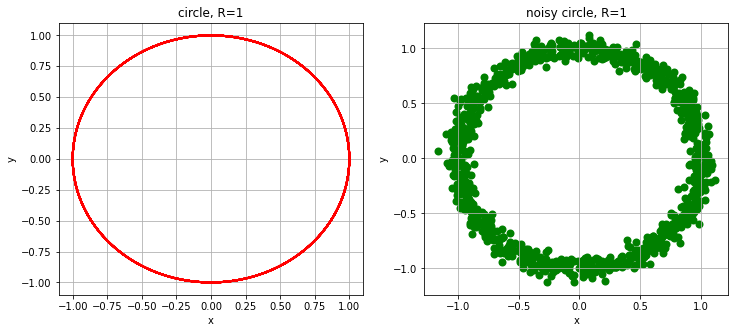

In [348]:
x_circle = np.cos(t)
y_circle = np.sin(t)
# x_circle_noisy , y_circle_noisy = make_noisy(x_circle) , make_noisy(y_circle)
x_circle_noisy , y_circle_noisy = create_noise(x_circle) , create_noise(y_circle)

# plt.figure()
plt.figure(figsize = figureSize)

plt.subplot(1,2,1)
plt.plot(x_circle,y_circle,linewidth=2,color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('circle, R=1')
plt.grid()



# plt.figure(figsize = figureSize)
plt.subplot(1,2,2)
plt.scatter(x_circle_noisy,y_circle_noisy,linewidth=2,color='g'  )
plt.xlabel('x')
plt.ylabel('y')
plt.title('noisy circle, R=1')
plt.grid()

In [349]:
noisy = np.zeros( (100, 1000  , 2))
denoised = np.zeros ( (100 , 1000  , 2))

for i in range(100):
  noisy[i,: ,0] , noisy[i , : , 1] = create_noise(x_circle) , create_noise(y_circle)
  denoised[i,: ,0] , denoised[i , : , 1] = x_circle ,y_circle


In [351]:
samplingConst =1
y_train , y_validation , y_test = denoised[ :,  :700*samplingConst  ], denoised[ : ,  700*samplingConst:800*samplingConst ], denoised[:,  800*samplingConst: ] 
x_train , x_validation , x_test = noisy[ :,:700*samplingConst ]   , noisy[:, 700*samplingConst:800*samplingConst  ]  , noisy[ :, 800*samplingConst: ]

In [352]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((100, 700, 2),
 (100, 100, 2),
 (100, 200, 2),
 (100, 700, 2),
 (100, 100, 2),
 (100, 200, 2))

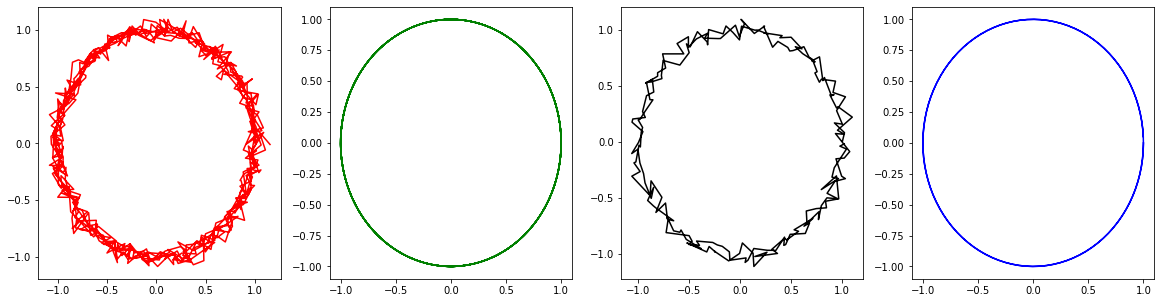

In [353]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
plt.plot(x_train[1, : , 0], x_train[1,: , 1], color= 'r')
plt.subplot(1,4,2)
plt.plot(y_train[1, : , 0] , y_train[1, : , 1],color ='g')
plt.subplot(1,4,3)
plt.plot(x_test[1, : , 0], x_test[1, : , 1] , color= 'k')
plt.subplot(1,4,4)
plt.plot(y_test[1, : , 0], y_test[1, : , 1] , color= 'b')

In [334]:
x_train = x_train.reshape((700,100,2))
x_validation = x_validation.reshape((100,100,2))
x_test = x_test.reshape((200,100,2))

y_train = y_train.reshape((700,100,2))
y_validation = y_validation.reshape((100,100,2))
y_test = y_test.reshape((200,100,2))

In [335]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((700, 100, 2),
 (100, 100, 2),
 (200, 100, 2),
 (700, 100, 2),
 (100, 100, 2),
 (200, 100, 2))

In [303]:
model_input = tf.keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))
model_output= tf.keras.layers.SimpleRNN(2, return_sequences=True)(model_input)
# model_output = tf.keras.layers.Dense(2 , activation = 'tanh') (m)
RNNmodel = tf.keras.models.Model(inputs=model_input, outputs=model_output)
RNNmodel.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
# my_adam_optimizer = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(loss='mse', optimizer= my_adam_optimizer )
history=RNNmodel.fit(x_train, y_train, epochs=10, validation_data=(x_validation, y_validation), batch_size=1, verbose=1)

Epoch 1/10
700/700 [==============================] - 9s 11ms/step - loss: 0.1184 - val_loss: 0.0359
Epoch 2/10
700/700 [==============================] - 7s 10ms/step - loss: 0.0223 - val_loss: 0.0161
Epoch 3/10
700/700 [==============================] - 9s 13ms/step - loss: 0.0148 - val_loss: 0.0133
Epoch 4/10
700/700 [==============================] - 7s 10ms/step - loss: 0.0124 - val_loss: 0.0113
Epoch 5/10
700/700 [==============================] - 10s 15ms/step - loss: 0.0106 - val_loss: 0.0098
Epoch 6/10
700/700 [==============================] - 7s 11ms/step - loss: 0.0092 - val_loss: 0.0086
Epoch 7/10
700/700 [==============================] - 7s 10ms/step - loss: 0.0081 - val_loss: 0.0076
Epoch 8/10
700/700 [==============================] - 9s 13ms/step - loss: 0.0072 - val_loss: 0.0068
Epoch 9/10
700/700 [==============================] - 7s 10ms/step - loss: 0.0065 - val_loss: 0.0061
Epoch 10/10
700/700 [==============================] - 8s 11ms/step - loss: 0.0059 - val_l

In [304]:
# Evaluation on the training
print('Evaluation with Test Set:')
loss = RNNmodel.evaluate(x_test, y_test, verbose=1)
print('Test loss:', loss)
# Prediction
y_hat = RNNmodel.predict(x_test)

Evaluation with Test Set:
7/7 [==============================] - 0s 11ms/step - loss: 0.0056
Test loss: 0.00560616422444582


In [305]:
y_resh = y_test.reshape((200,100,2))
x_resh = x_test.reshape((100,200,2))
resh = y_hat.reshape((100,200 , 2))

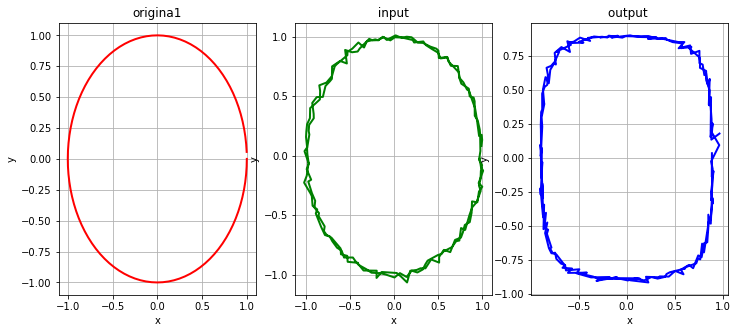

In [302]:
plt.figure(figsize = figureSize)
plt.subplot(1,3,1)

# plt.scatter(y_test.reshape((20000,2))[:,0],y_test.reshape((20000,2))[:,1],linewidth=2,color='r')
plt.plot(y_resh [1, : , 0],y_resh[1 , :, 1],linewidth=2,color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('origina1')
plt.grid()

plt.subplot(1,3,2)
# plt.scatter(x_test.reshape((20000,2))[:,0],y_hat.reshape((20000,2))[:,1],linewidth=2,color='g')
plt.plot(x_resh [1, : , 0], x_resh[1 , :, 1],linewidth=2,color='g')

plt.xlabel('x')
plt.ylabel('y')
plt.title(' input ')
plt.grid()


plt.subplot(1,3,3)
plt.plot(resh [1, : , 0], resh[1 , :, 1],linewidth=2,color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('output ')
plt.grid()

epitrochoid

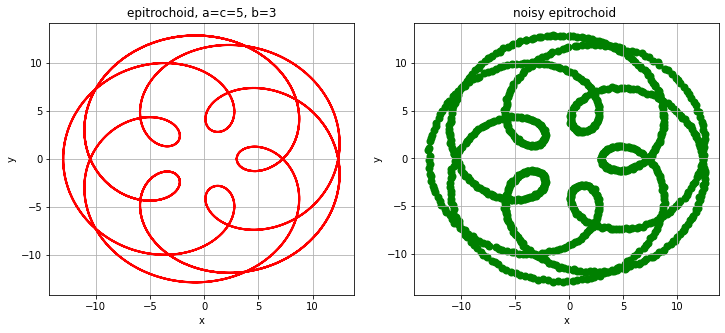

In [397]:
a=5;b=3;c=5
x_epitrochoid = (a+b)*np.cos(t)-c*np.cos((a/b +1)* t)
y_epitrochoid = (a+b)*np.sin(t)-c*np.sin((a/b +1)* t)
x_epitrochoid_noisy , y_epitrochoid_noisy = create_noise(x_epitrochoid) , create_noise(y_epitrochoid)
plt.figure(figsize = figureSize)

plt.subplot(1,2,1)

plt.plot(x_epitrochoid,y_epitrochoid,linewidth=2,color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('epitrochoid, a=c=5, b=3')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(x_epitrochoid_noisy,y_epitrochoid_noisy,linewidth=2,color='g'  )
plt.xlabel('x')
plt.ylabel('y')
plt.title('noisy epitrochoid ')
plt.grid()

In [419]:
noisy = np.zeros( (100, 1000  , 2))
denoised = np.zeros ( (100 , 1000  , 2))

for i in range(100):
  noisy[i,: ,0] , noisy[i , : , 1] = create_noise(x_epitrochoid) , create_noise(y_epitrochoid)
  denoised[i,: ,0] , denoised[i , : , 1] = x_epitrochoid ,y_epitrochoid


In [420]:
maximum = noisy.max()
noisy = noisy / maximum
denoised = denoised / maximum

In [421]:
samplingConst =1
y_train , y_validation , y_test = denoised[ :,  :700*samplingConst  ], denoised[ : ,  700*samplingConst:800*samplingConst ], denoised[:,  800*samplingConst: ] 
x_train , x_validation , x_test = noisy[ :,:700*samplingConst ]   , noisy[:, 700*samplingConst:800*samplingConst  ]  , noisy[ :, 800*samplingConst: ]

In [423]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((100, 700, 2),
 (100, 100, 2),
 (100, 200, 2),
 (100, 700, 2),
 (100, 100, 2),
 (100, 200, 2))

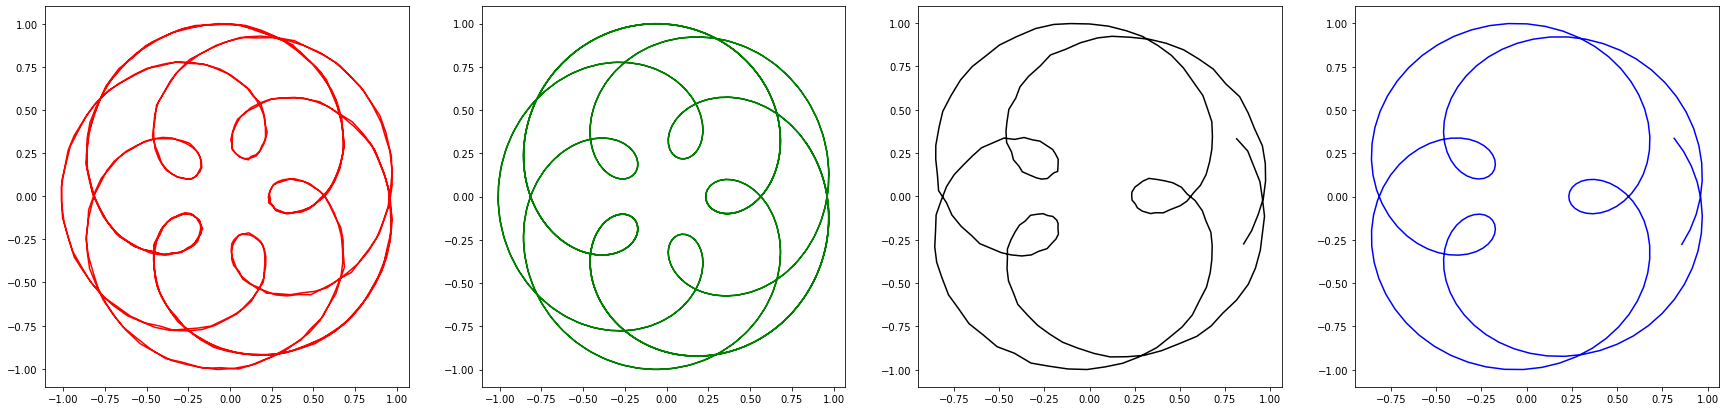

In [424]:
plt.figure(figsize = (30,7))
plt.subplot(1,4,1)
plt.plot(x_train[1, : , 0], x_train[1,: , 1], color= 'r')
plt.subplot(1,4,2)
plt.plot(y_train[1, : , 0] , y_train[1, : , 1],color ='g')
plt.subplot(1,4,3)
plt.plot(x_test[1, : , 0], x_test[1, : , 1] , color= 'k')
plt.subplot(1,4,4)
plt.plot(y_test[1, : , 0], y_test[1, : , 1] , color= 'b')

In [426]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((100, 700, 2),
 (100, 100, 2),
 (100, 200, 2),
 (100, 700, 2),
 (100, 100, 2),
 (100, 200, 2))

In [427]:
x_train = x_train.reshape((700,100,2))
x_validation = x_validation.reshape((100,100,2))
x_test = x_test.reshape((200,100,2))

y_train = y_train.reshape((700,100,2))
y_validation = y_validation.reshape((100,100,2))
y_test = y_test.reshape((200,100,2))

In [430]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((700, 100, 2),
 (100, 100, 2),
 (200, 100, 2),
 (700, 100, 2),
 (100, 100, 2),
 (200, 100, 2))

In [433]:
model_input = tf.keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))
model_output= tf.keras.layers.SimpleRNN(2, return_sequences=True)(model_input)
# model_output = tf.keras.layers.Dense(2 , activation = 'tanh') (m)
RNNmodel = tf.keras.models.Model(inputs=model_input, outputs=model_output)
RNNmodel.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
# my_adam_optimizer = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(loss='mse', optimizer= my_adam_optimizer )
history=RNNmodel.fit(x_train, y_train, epochs=30, validation_data=(x_validation, y_validation), batch_size=4, verbose=1)

Epoch 1/30
175/175 [==============================] - 5s 21ms/step - loss: 0.2052 - val_loss: 0.1371
Epoch 2/30
175/175 [==============================] - 3s 20ms/step - loss: 0.1422 - val_loss: 0.0952
Epoch 3/30
175/175 [==============================] - 4s 20ms/step - loss: 0.0892 - val_loss: 0.0550
Epoch 4/30
175/175 [==============================] - 3s 20ms/step - loss: 0.0469 - val_loss: 0.0333
Epoch 5/30
175/175 [==============================] - 4s 20ms/step - loss: 0.0284 - val_loss: 0.0247
Epoch 6/30
175/175 [==============================] - 4s 20ms/step - loss: 0.0201 - val_loss: 0.0205
Epoch 7/30
175/175 [==============================] - 4s 20ms/step - loss: 0.0162 - val_loss: 0.0184
Epoch 8/30
175/175 [==============================] - 3s 20ms/step - loss: 0.0143 - val_loss: 0.0173
Epoch 9/30
175/175 [==============================] - 4s 21ms/step - loss: 0.0132 - val_loss: 0.0159
Epoch 10/30
175/175 [==============================] - 3s 19ms/step - loss: 0.0124 - val_lo

In [434]:
# Evaluation on the training
print('Evaluation with Test Set:')
loss = RNNmodel.evaluate(x_test, y_test, verbose=1)
print('Test loss:', loss)
# Prediction
y_hat = RNNmodel.predict(x_test)

Evaluation with Test Set:
7/7 [==============================] - 0s 13ms/step - loss: 0.0042
Test loss: 0.004187473561614752


In [435]:
y_resh = y_test.reshape((200,100,2))
x_resh = x_test.reshape((100,200,2))
resh = y_hat.reshape((100,200 , 2))

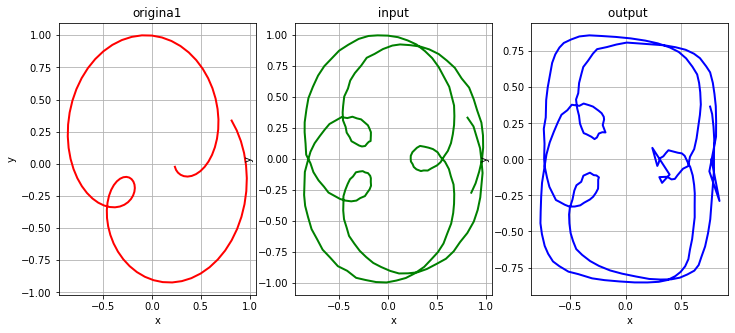

In [438]:
plt.figure(figsize = figureSize)
plt.subplot(1,3,1)

# plt.scatter(y_test.reshape((20000,2))[:,0],y_test.reshape((20000,2))[:,1],linewidth=2,color='r')
plt.plot(y_resh [1, : , 0],y_resh[1 , :, 1],linewidth=2,color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('origina1')
plt.grid()

plt.subplot(1,3,2)
# plt.scatter(x_test.reshape((20000,2))[:,0],y_hat.reshape((20000,2))[:,1],linewidth=2,color='g')
plt.plot(x_resh [1, : , 0], x_resh[1 , :, 1],linewidth=2,color='g')

plt.xlabel('x')
plt.ylabel('y')
plt.title(' input ')
plt.grid()


plt.subplot(1,3,3)
plt.plot(resh [1, : , 0], resh[1 , :, 1],linewidth=2,color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('output ')
plt.grid()

nephroid

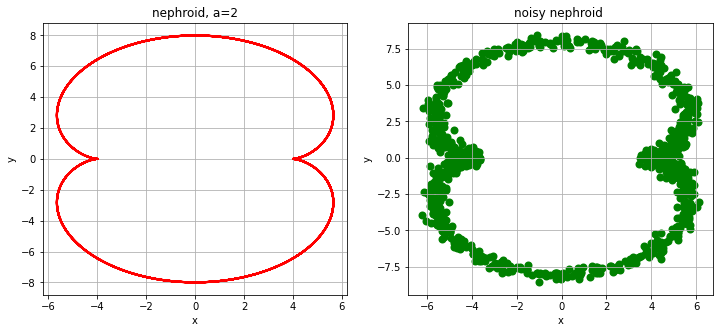

In [458]:
a=2
x_nephroid = a*(np.cos(3*t)-3*np.cos(t))
y_nephroid = a*(np.sin(3*t)-3*np.sin(t))
x_nephroid_noisy , y_nephroid_noisy = make_noisy(x_nephroid) , make_noisy(y_nephroid)
plt.figure(figsize = figureSize)
plt.subplot(1,2,1)

plt.plot(x_nephroid,y_nephroid,linewidth=2,color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('nephroid, a=2')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(x_nephroid_noisy,y_nephroid_noisy,linewidth=2,color='g'  )
plt.xlabel('x')
plt.ylabel('y')
plt.title('noisy nephroid ')
plt.grid()

In [459]:
noisy = np.zeros( (100, 1000  , 2))
denoised = np.zeros ( (100 , 1000  , 2))

for i in range(100):
  noisy[i,: ,0] , noisy[i , : , 1] = create_noise(x_nephroid) , create_noise(y_nephroid)
  denoised[i,: ,0] , denoised[i , : , 1] = x_nephroid ,y_nephroid


In [460]:
maximum = denoised.max()
denoised = denoised / maximum
noisy = noisy / maximum

In [461]:
samplingConst =1
y_train , y_validation , y_test = denoised[ :,  :700*samplingConst  ], denoised[ : ,  700*samplingConst:800*samplingConst ], denoised[:,  800*samplingConst: ] 
x_train , x_validation , x_test = noisy[ :,:700*samplingConst ]   , noisy[:, 700*samplingConst:800*samplingConst  ]  , noisy[ :, 800*samplingConst: ]

In [462]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((100, 700, 2),
 (100, 100, 2),
 (100, 200, 2),
 (100, 700, 2),
 (100, 100, 2),
 (100, 200, 2))

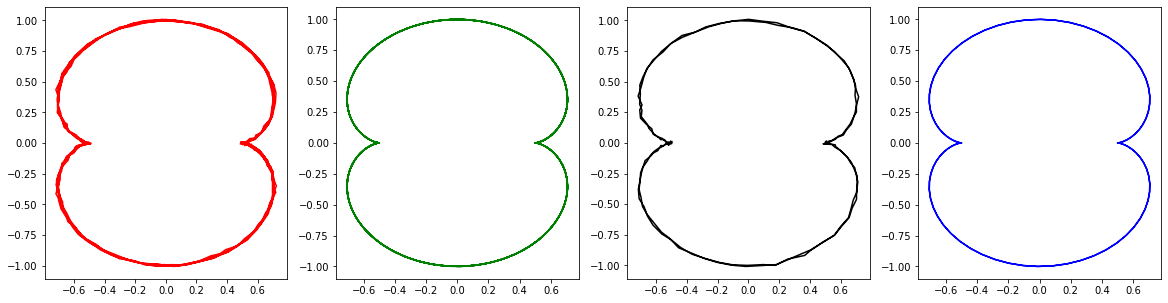

In [463]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
plt.plot(x_train[1, : , 0], x_train[1,: , 1], color= 'r')
plt.subplot(1,4,2)
plt.plot(y_train[1, : , 0] , y_train[1, : , 1],color ='g')
plt.subplot(1,4,3)
plt.plot(x_test[1, : , 0], x_test[1, : , 1] , color= 'k')
plt.subplot(1,4,4)
plt.plot(y_test[1, : , 0], y_test[1, : , 1] , color= 'b')

In [464]:
x_train = x_train.reshape((700,100,2))
x_validation = x_validation.reshape((100,100,2))
x_test = x_test.reshape((200,100,2))

y_train = y_train.reshape((700,100,2))
y_validation = y_validation.reshape((100,100,2))
y_test = y_test.reshape((200,100,2))

In [465]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((700, 100, 2),
 (100, 100, 2),
 (200, 100, 2),
 (700, 100, 2),
 (100, 100, 2),
 (200, 100, 2))

In [471]:
y_train.shape , y_validation.shape , y_test.shape , x_train.shape , x_validation.shape , x_test.shape

((700, 100, 2),
 (100, 100, 2),
 (200, 100, 2),
 (700, 100, 2),
 (100, 100, 2),
 (200, 100, 2))

In [472]:
model_input = tf.keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))
model_output= tf.keras.layers.SimpleRNN(2, return_sequences=True)(model_input)
# model_output = tf.keras.layers.Dense(2 , activation = 'tanh') (m)
model = tf.keras.models.Model(inputs=model_input, outputs=model_output)
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
# my_adam_optimizer = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(loss='mse', optimizer= my_adam_optimizer )
history=model.fit(x_train, y_train, epochs=30, validation_data=(x_validation, y_validation), batch_size=4, verbose=1)

Epoch 1/60
175/175 [==============================] - 5s 21ms/step - loss: 0.5951 - val_loss: 0.5018
Epoch 2/60
175/175 [==============================] - 4s 22ms/step - loss: 0.4260 - val_loss: 0.3614
Epoch 3/60
175/175 [==============================] - 5s 30ms/step - loss: 0.3174 - val_loss: 0.2792
Epoch 4/60
175/175 [==============================] - 3s 17ms/step - loss: 0.2506 - val_loss: 0.2242
Epoch 5/60
175/175 [==============================] - 3s 17ms/step - loss: 0.2025 - val_loss: 0.1816
Epoch 6/60
175/175 [==============================] - 3s 17ms/step - loss: 0.1635 - val_loss: 0.1457
Epoch 7/60
175/175 [==============================] - 3s 17ms/step - loss: 0.1299 - val_loss: 0.1143
Epoch 8/60
175/175 [==============================] - 3s 17ms/step - loss: 0.1006 - val_loss: 0.0875
Epoch 9/60
175/175 [==============================] - 3s 17ms/step - loss: 0.0769 - val_loss: 0.0671
Epoch 10/60
175/175 [==============================] - 3s 17ms/step - loss: 0.0595 - val_lo

In [477]:
# Evaluation on the training
print('Evaluation with Test Set:')
loss = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', loss)
# Prediction
y_hat = model.predict(x_test)

Evaluation with Test Set:
7/7 [==============================] - 0s 11ms/step - loss: 0.0016
Test loss: 0.0015735182678326964


In [478]:
x_test.shape

(200, 100, 2)

In [479]:
y_hat.shape

(200, 100, 2)

In [480]:
y_resh = y_test.reshape((200,100,2))
x_resh = x_test.reshape((100,200,2))
resh = y_hat.reshape((100,200 , 2))

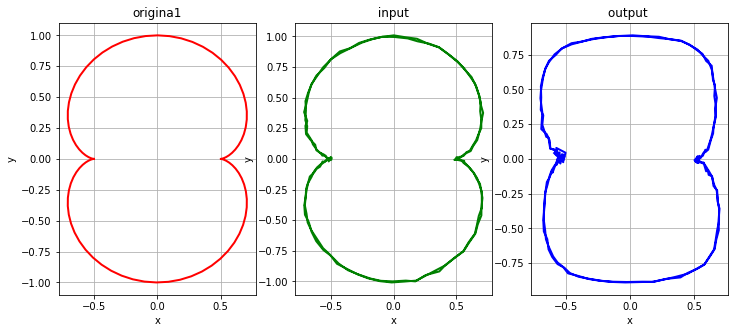

In [487]:
plt.figure(figsize = figureSize)
plt.subplot(1,3,1)

plt.plot(y_resh [1, : , 0],y_resh[1 , :, 1],linewidth=2,color='r')
# plt.scatter(y_resh [1, : , 0],y_resh[1 , :, 1],linewidth=2,color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('origina1')
plt.grid()

plt.subplot(1,3,2)
plt.plot(x_resh [1, : , 0], x_resh[1 , :, 1],linewidth=2,color='g')
# plt.scatter(x_resh [1, : , 0], x_resh[1 , :, 1],linewidth=2,color='g')

plt.xlabel('x')
plt.ylabel('y')
plt.title(' input ')
plt.grid()


plt.subplot(1,3,3)
plt.plot(resh [1, : , 0], resh[1 , :, 1],linewidth=2,color='b')
# plt.scatter(resh [1, : , 0], resh[1 , :, 1],linewidth=2,color='b')

plt.xlabel('x')
plt.ylabel('y')
plt.title('output ')
plt.grid()